In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')

In [2]:
from importlib import reload
import mahalanobis as mahala
reload(mahala)

<module 'mahalanobis' from '/home/dev/Documentos/Dev.Academy/andromeda/src/quixada/predict/mahalanobis.py'>

In [3]:
df = pd.read_csv('../../../data/miner/df_qtde_ref.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
0,2.49,1,2,2,0,1,0,240.0
1,2.35,1,3,3,0,1,0,331.0
2,2.29,1,4,4,0,1,0,310.0
3,2.29,1,5,5,1,1,0,228.0
4,2.29,1,6,6,1,1,0,127.0


In [4]:
df['mahala'] = mahala.calc_mahalanobis_distance(df, df)
df = mahala.removing_outlier_with_mahalanobis_distance(df)
df = df.drop(['mahala'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 406
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valor_unit  381 non-null    float64
 1   mes         381 non-null    int64  
 2   dia_semana  381 non-null    int64  
 3   dia         381 non-null    int64  
 4   fim_semana  381 non-null    int64  
 5   inicio_mes  381 non-null    int64  
 6   feriado     381 non-null    int64  
 7   quantidade  381 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 26.8 KB


In [6]:
df['dia_semana'] = df.dia_semana.astype('category')
df['dia']        = df.dia.astype('category')
df['fim_semana'] = df.fim_semana.astype('category')
df['inicio_mes'] = df.inicio_mes.astype('category')
df['feriado']    = df.feriado.astype('category')

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['mse', 'mae'],
    'bootstrap': [True],
    'max_depth': ['None', 5, 10, 20, 40],
    'min_impurity_decrease' : [0.0, 0.02, 0.03, 0.04, 0.05],
    'min_samples_leaf': ['None', 1, 2, 3],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [20, 50, 80, 100]
}

In [9]:
# Create a based model
rf = RandomForestRegressor(random_state=0)

In [10]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 7, n_jobs = -1, verbose = 2)

In [11]:
X = df.drop('quantidade', axis = 1)
y = df['quantidade']

In [12]:
grid_search.fit(X, y)

Fitting 7 folds for each of 2400 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 7792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10756 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12668 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 15044 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 16800 out of 16800 | elapsed:  5.1min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [13]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'min_impurity_decrease': 0.03,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [14]:
best_grid = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.029,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.029,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [15]:
best_grid.fit(X, y)
y_pred = best_grid.predict(X)

In [16]:
rmse = np.sqrt(mse(y, y_pred))
rmse

24.989742630119643

In [17]:
RF = RandomForestRegressor(random_state=0, n_estimators=100)

In [18]:
RF.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred = RF.predict(X)

In [20]:
rmse = np.sqrt(mse(y, y_pred))

In [21]:
rmse

26.382898018868506

### Vizualization 

In [22]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

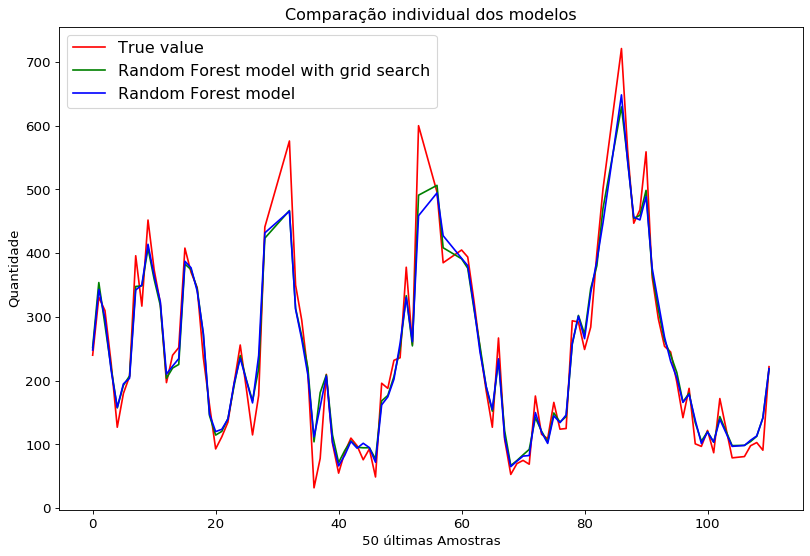

In [25]:
plt.plot(df.index[:100], y[:100], color='red', label='True value')
plt.plot(df.index[:100], best_grid.predict(X)[:100], color='green', label='Random Forest model with grid search')
plt.plot(df.index[:100], RF.predict(X)[:100], color='blue', label='Random Forest model')

plt.ylabel('Quantidade')
plt.xlabel('50 últimas Amostras')
plt.legend(loc="best")
plt.title('Comparação individual dos modelos')
plt.show()